<a href="https://colab.research.google.com/github/kang9366/Cifar-10-Image-Classification/blob/main/Cifar_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 모듈 import

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 데이터셋 다운로드, 전처리

In [7]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [8]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=66, test_size=0.1)

In [9]:
print("X_train shape : ", X_train.shape)
print("Train size : ", X_train.shape[0])
print("Validation size : ", X_val.shape[0])
print("Test size : ", X_test.shape[0])

X_train shape :  (45000, 32, 32, 3)
Train size :  45000
Validation size :  5000
Test size :  10000


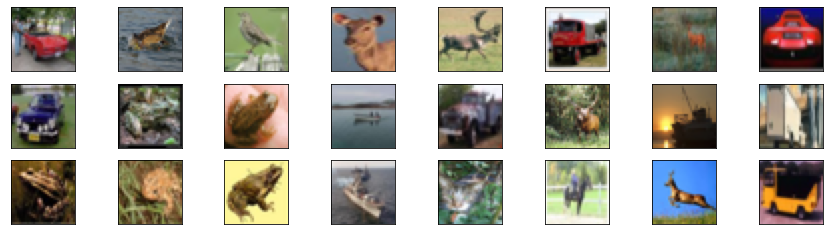

In [10]:
fig = plt.figure(figsize=(15,4))

for i in range(24):
    ax = fig.add_subplot(3, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [11]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split=0.1)

train_gen.fit(X_train)

## 모델 구성

### 처음 구성한 모델

In [ ]:
# model = Sequential([
#     tf.keras.layers.Conv2D(32, kernel_size=3, padding='same',input_shape = (32, 32, 3),activation='relu'),
#     tf.keras.layers.Conv2D(32, kernel_size=3, padding='same',activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(64,3,3,activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10,activation='softmax')
# ])

### 수정한 모델

In [19]:
model = Sequential([
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', input_shape=(32,32,3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding = 'same'),

    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding = 'same'),

    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding = 'same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, Activation('relu')),
    tf.keras.layers.Dense(10, Activation('softmax'))
])

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                      

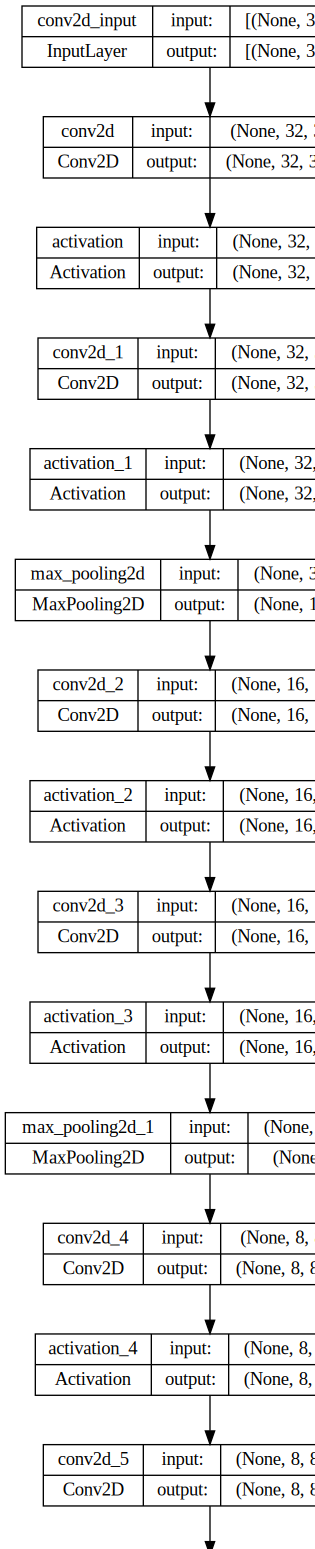

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
dot_res = model_to_dot(model,show_shapes=True, dpi=50).create(prog='dot', format='svg')
fi = open("dotres.svg", 'wb')
fi.write(dot_res)
fi.close()

SVG(model_to_dot(model, show_shapes = True, dpi=50).create(prog = 'dot', format = 'svg'))

## 모델 학습

In [21]:
history = model.fit_generator(train_gen.flow(X_train, y_train, batch_size=128), epochs = 20, validation_data=(X_val, y_val),verbose = 1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


 61/352 [====>.........................] - ETA: 19s - loss: 2.1724 - accuracy: 0.1656

KeyboardInterrupt: ignored

## 모델 평가

### loss

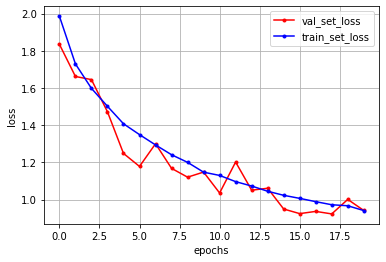

In [17]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### accuracy

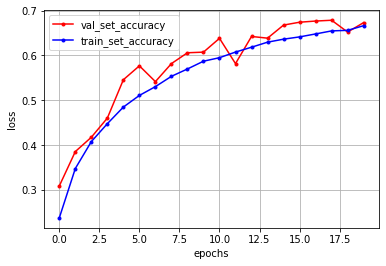

In [18]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### model evaluate

In [16]:
model.evaluate(X_test, y_test, batch_size = 128, verbose=1)

79/79 [==============================] - 1s 10ms/step - loss: 0.9752 - accuracy: 0.6714


[0.9751951098442078, 0.6714000105857849]